In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud
import numpy as np

# 设置绘图风格
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 1. Step1 LoadDataset

In [4]:
try:
    dataset = load_dataset("HuggingFaceH4/ultrafeedback_binarized", cache_dir="../data/ultrafeedback_binarize", split="train_prefs")
    print("数据集加载成功！")
except Exception as e:
    print(f"加载数据集失败: {e}")
    print("请检查你的网络连接或数据集名称是否正确。")

# 将数据集转换为Pandas DataFrame以便于操作
if 'dataset' in locals():
    df = dataset.to_pandas()

数据集加载成功！


# 2. Step2 Overview

In [5]:
if 'df' in locals():
    print("数据集基本信息:")
    df.info()

    print("\n\n数据集前5行预览:")
    display(df.head())

    print(f"\n\n数据集包含 {len(df)} 条样本。")

数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61135 entries, 0 to 61134
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prompt          61135 non-null  object 
 1   prompt_id       61135 non-null  object 
 2   chosen          61135 non-null  object 
 3   rejected        61135 non-null  object 
 4   messages        61135 non-null  object 
 5   score_chosen    61135 non-null  float64
 6   score_rejected  61135 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.3+ MB


数据集前5行预览:


,prompt,prompt_id,chosen,rejected,messages,score_chosen,score_rejected
0,how can i develop a habit of drawing daily,086b3e24f29b8956a01059f79c56db35d118a06fb6b844...,[{'content': 'how can i develop a habit of dra...,[{'content': 'how can i develop a habit of dra...,[{'content': 'how can i develop a habit of dra...,8.5,8.5
1,how can I transform the getPosition method of ...,2766cbd1fed7f982d94b031596e771c841668bd8913839...,[{'content': 'how can I transform the getPosit...,[{'content': 'how can I transform the getPosit...,[{'content': 'how can I transform the getPosit...,6.5,6.5
2,"Given a sentence in French, provide an equival...",0efb42706b3fcc906f579505c7cc0c4e68a640ab3862b1...,"[{'content': 'Given a sentence in French, prov...","[{'content': 'Given a sentence in French, prov...","[{'content': 'Given a sentence in French, prov...",6.0,3.0
3,"Which animal has two hands, a hyrax or a dog?",d169f4610d69b94f54b6923e11aeffe2e321e272395686...,"[{'content': 'Which animal has two hands, a hy...","[{'content': 'Which animal has two hands, a hy...","[{'content': 'Which animal has two hands, a hy...",9.0,8.0
4,Can you explain more about how Tamping Coke is...,ac205b0f69d45eae8dbf446673bd78284e230b6ce3381e...,[{'content': 'Can you explain more about how T...,[{'content': 'Can you explain more about how T...,[{'content': 'Can you explain more about how T...,8.0,6.0




数据集包含 61135 条样本。


In [20]:
print(df.iloc[0]['chosen'])

[{'content': 'how can i develop a habit of drawing daily', 'role': 'user'}
 {'content': "Developing a daily habit of drawing can be challenging but with consistent practice and a few tips, it can become an enjoyable and rewarding part of your daily routine. Here are some strategies to help you develop the habit of drawing daily:\n\n1. Set a specific time: Allocate a specific time of the day to draw. It could be in the morning, afternoon, or evening. Make drawing a part of your daily routine.\n2. Set a specific duration: Determine the amount of time you want to spend on drawing each day. It can be as little as 10 minutes or as long as an hour. Be consistent with the duration to help build the habit.\n3. Start small and simple: Don't try to create a masterpiece every day, start with simple and easy-to-do sketches. Focus on improving your skills gradually.\n4. Use a variety of tools and mediums: Experiment with different tools like pencils, pens, markers, and different mediums like paper,

# 3. Step3 Draw some examples

In [7]:
def show_sample(index):
    """打印指定索引的样本详情"""
    sample = df.iloc[index]
    print("----------- 样本详情 -----------")
    print(f"索引: {index}")
    print("\n[Prompt]:")
    print(sample['prompt'])
    print("\n\n[Chosen Response]:")
    # 'chosen' 是一个包含字典的列表，我们提取'content'
    print(sample['chosen'][1]['content'])
    print(f"\n(Score: {sample['score_chosen']:.4f})")
    print("\n\n[Rejected Response]:")
    # 'rejected' 也是一个包含字典的列表
    print(sample['rejected'][1]['content'])
    print(f"\n(Score: {sample['score_rejected']:.4f})")
    print("----------------------------------")


# 显示一个随机样本
if 'df' in locals():
    random_index = np.random.randint(0, len(df))
    show_sample(random_index)

----------- 样本详情 -----------
索引: 9409

[Prompt]:
You will be given a definition of a task first, then some input of the task.
The provided files include famous book titles and sentences in the English language, and we ask you to translate those to the Catalan Language. Please bear in mind the following guidelines while doing the translation: 1) We are looking for the most naturally written and form of each sentence in the Catalan language. 2) Also names, dates and places should be preserved it should not get translated.

The slightest mention of anything relative to Willoughby overpowered her in an instant; and though her family were most anxiously attentive to her comfort, it was impossible for them, if they spoke at all, to keep clear of every subject which her feelings connected with him.
Output:


[Chosen Response]:
Joanot pot evit que la menció d'Willoughby li agafi instantaniàiments; i a pesar que la seva família estava molt atenció a el seu confort, no era possible que ho pogues

# 4. Step4 Data distribution

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

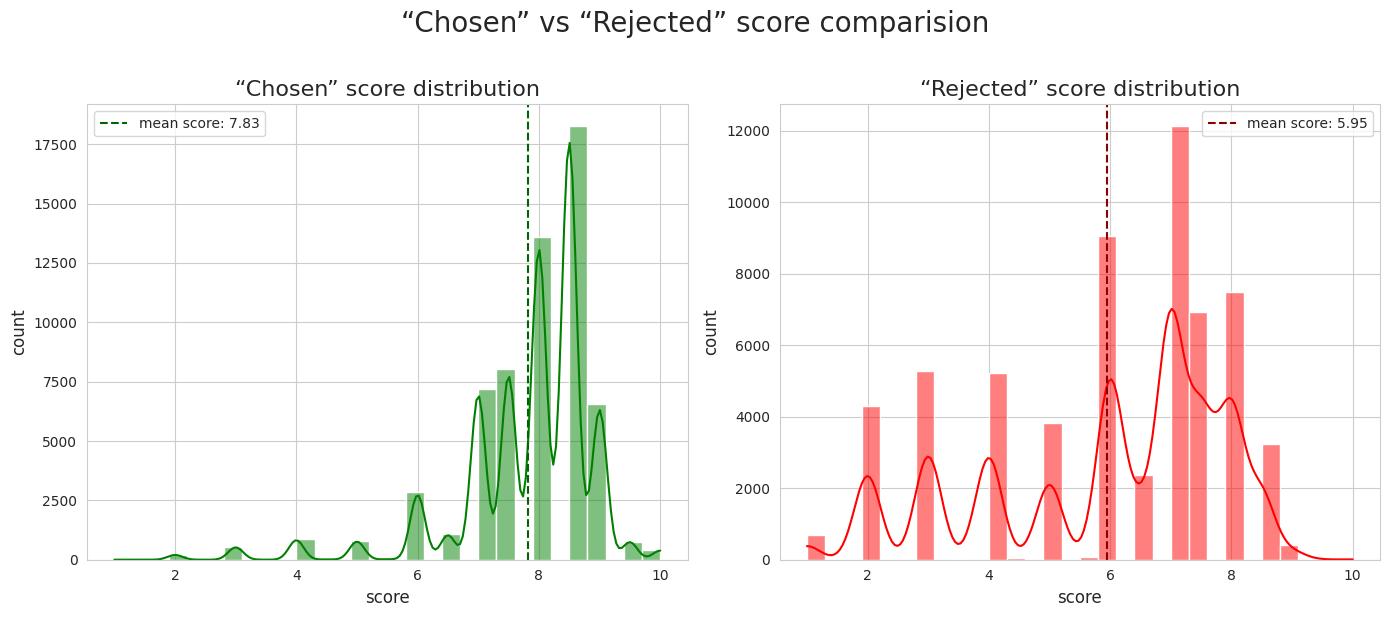

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

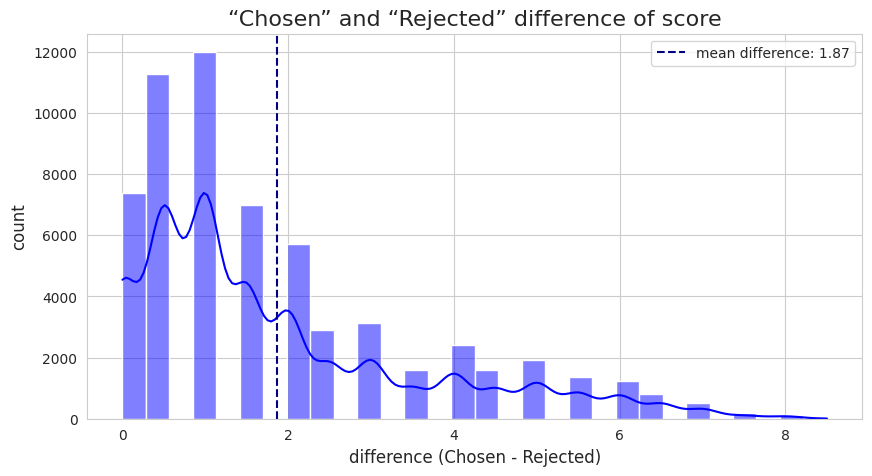

In [12]:
if 'df' in locals():
    plt.figure(figsize=(14, 6))

    # 绘制 'score_chosen' 的分布
    plt.subplot(1, 2, 1)
    sns.histplot(df['score_chosen'], kde=True, color='green', bins=30)
    plt.title('“Chosen” score distribution', fontsize=16)
    plt.xlabel('score', fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.axvline(df['score_chosen'].mean(), color='darkgreen', linestyle='--', label=f'mean score: {df["score_chosen"].mean():.2f}')
    plt.legend()

    # 绘制 'score_rejected' 的分布
    plt.subplot(1, 2, 2)
    sns.histplot(df['score_rejected'], kde=True, color='red', bins=30)
    plt.title('“Rejected” score distribution', fontsize=16)
    plt.xlabel('score', fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.axvline(df['score_rejected'].mean(), color='darkred', linestyle='--', label=f'mean score: {df["score_rejected"].mean():.2f}')
    plt.legend()

    plt.suptitle('“Chosen” vs “Rejected” score comparision', fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

    # 分析分数差异
    df['score_difference'] = df['score_chosen'] - df['score_rejected']
    plt.figure(figsize=(10, 5))
    sns.histplot(df['score_difference'], kde=True, color='blue', bins=30)
    plt.title('“Chosen” and “Rejected” difference of score', fontsize=16)
    plt.xlabel('difference (Chosen - Rejected)', fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.axvline(df['score_difference'].mean(), color='navy', linestyle='--', label=f'mean difference: {df["score_difference"].mean():.2f}')
    plt.legend()
    plt.show()

# 5. Step5 sft data

In [2]:
try:
    dataset = load_dataset("HuggingFaceH4/ultrafeedback_binarized", cache_dir="../data/ultrafeedback_binarize", split="train_sft")
    print("数据集加载成功！")
except Exception as e:
    print(f"加载数据集失败: {e}")
    print("请检查你的网络连接或数据集名称是否正确。")

# 将数据集转换为Pandas DataFrame以便于操作
if 'dataset' in locals():
    df = dataset.to_pandas()

加载数据集失败: name 'load_dataset' is not defined
请检查你的网络连接或数据集名称是否正确。


In [27]:
def show_sample(index):
    """打印指定索引的样本详情"""
    sample = df.iloc[index]
    print("----------- 样本详情 -----------")
    print(f"索引: {index}")
    print("\n[Prompt]:")
    print(sample['prompt'])
    print("\n\n[Chosen Response]:")
    # 'chosen' 是一个包含字典的列表，我们提取'content'
    print(sample['chosen'][1]['content'])
    print(f"\n(Score: {sample['score_chosen']:.4f})")
    print("\n\n[Rejected Response]:")
    # 'rejected' 也是一个包含字典的列表
    print(sample['rejected'][1]['content'])
    print(f"\n(Score: {sample['score_rejected']:.4f})")
    print("----------------------------------")


# 显示一个随机样本
if 'df' in locals():
    random_index = np.random.randint(0, len(df))
    show_sample(3)

----------- 样本详情 -----------
索引: 3

[Prompt]:
Which animal has two hands, a hyrax or a dog?


[Chosen Response]:
Neither a hyrax nor a dog has hands. Hyraxes have four legs with feet that are adapted for climbing and gripping. Similarly, dogs also have four legs with paws. The term "hands" is usually reserved for primates, such as humans, which have opposable thumbs and fingers.

(Score: 9.0000)


[Rejected Response]:
Thank you for your question. I'm happy to help you with that! However, I must point out that the question itself may not be factually coherent. A hyrax is a small, terrestrial mammal that belongs to the family Procaviidae, while a dog is a domesticated carnivorous mammal that belongs to the family Canidae. Neither of these animals have two hands.

Instead, I suggest rephrasing the question to ensure it is factually accurate. For example, "Which animal has four legs, a hyrax or a dog?" would be a more appropriate and factual question.

Please let me know if there's anythin

In [28]:
try:
    dataset = load_dataset("HuggingFaceH4/ultrafeedback_binarized", cache_dir="../data/ultrafeedback_binarize", split="train_prefs")
    print("数据集加载成功！")
except Exception as e:
    print(f"加载数据集失败: {e}")
    print("请检查你的网络连接或数据集名称是否正确。")

# 将数据集转换为Pandas DataFrame以便于操作
if 'dataset' in locals():
    df = dataset.to_pandas()

数据集加载成功！


In [29]:
if 'df' in locals():
    random_index = np.random.randint(0, len(df))
    show_sample(3)

----------- 样本详情 -----------
索引: 3

[Prompt]:
Which animal has two hands, a hyrax or a dog?


[Chosen Response]:
Neither a hyrax nor a dog has hands. Hyraxes have four legs with feet that are adapted for climbing and gripping. Similarly, dogs also have four legs with paws. The term "hands" is usually reserved for primates, such as humans, which have opposable thumbs and fingers.

(Score: 9.0000)


[Rejected Response]:
Thank you for your question. I'm happy to help you with that! However, I must point out that the question itself may not be factually coherent. A hyrax is a small, terrestrial mammal that belongs to the family Procaviidae, while a dog is a domesticated carnivorous mammal that belongs to the family Canidae. Neither of these animals have two hands.

Instead, I suggest rephrasing the question to ensure it is factually accurate. For example, "Which animal has four legs, a hyrax or a dog?" would be a more appropriate and factual question.

Please let me know if there's anythin